In [91]:
import pandas as pd
import numpy as np
import os, glob
import pickle
import matplotlib.pyplot as plt
#import seaborn as sns
import datetime as dt

import seaborn as sns

# EDA and Insights for Air Traffic Dataset

* Dataset sources: [U.S. International Air Passenger and Freight Statistics Report](https://www.transportation.gov/policy/aviation-policy/us-international-air-passenger-and-freight-statistics-report). Also avalibale at https://www.kaggle.com/parulpandey/us-international-air-traffic-data


* Column descriptions: https://data.transportation.gov/Aviation/International_Report_Passengers/xgub-n9bw


In [2]:
depart = pd.read_csv('Air_Traffic_data/International_Report_Departures.csv')
passen = pd.read_csv('Air_Traffic_data/International_Report_Passengers.csv')

depart['data_dte'] = pd.to_datetime(depart['data_dte'],errors='coerce',infer_datetime_format=True)
passen['data_dte'] = pd.to_datetime(passen['data_dte'],errors='coerce',infer_datetime_format=True)


In [3]:
# Categorical type
cate_feat = ['Year', 'Month']  #, 'usg_apt_id', 'fg_apt_id', 'fg_wac', 'airlineid', 'carriergroup'
depart[cate_feat] = depart[cate_feat].astype("category")
passen[cate_feat] = passen[cate_feat].astype("category")

In [4]:
# Check the dataframe size
display(depart.shape)
display(passen.shape)

(930808, 16)

(680985, 16)

In [5]:
depart = depart.sort_values(by=['data_dte','Year','Month','usg_apt_id','fg_apt_id'])
passen = passen.sort_values(by=['data_dte','Year','Month','usg_apt_id','fg_apt_id'])

In [141]:
# merge_by_col = ['data_dte','Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac', 
#                 'fg_apt_id', 'fg_apt', 'fg_wac',
#                 'airlineid', 'carrier', 
#                 'carriergroup']

# merged_df = pd.merge(depart, passen, on=merge_by_col, how='outer', suffixes=('_d', '_p')).sort_values('data_dte')
# merged_df

In [169]:
display(depart.info())
display(depart.describe())
depart.select_dtypes(include=['object', 'category']).describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930808 entries, 170533 to 263208
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   data_dte      930808 non-null  datetime64[ns]
 1   Year          930808 non-null  category      
 2   Month         930808 non-null  category      
 3   usg_apt_id    930808 non-null  int64         
 4   usg_apt       930808 non-null  object        
 5   usg_wac       930808 non-null  int64         
 6   fg_apt_id     930808 non-null  int64         
 7   fg_apt        930808 non-null  object        
 8   fg_wac        930808 non-null  int64         
 9   airlineid     930808 non-null  int64         
 10  carrier       927753 non-null  object        
 11  carriergroup  930808 non-null  int64         
 12  type          930808 non-null  object        
 13  Scheduled     930808 non-null  int64         
 14  Charter       930808 non-null  int64         
 15  Total       

None

,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000
mean,12809.473781,42.511740,13484.676238,466.910479,20057.217505,0.599361,40.003181,2.005483,42.008665
std,2716.223845,27.571338,1932.601107,288.005971,479.071456,0.490028,60.948973,8.278403,60.340835
min,10010.000000,1.000000,10119.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,11618.000000,22.000000,11868.000000,205.000000,19704.000000,0.000000,0.000000,0.000000,3.000000
50%,12892.000000,33.000000,13408.000000,427.000000,19991.000000,1.000000,17.000000,0.000000,20.000000
75%,13487.000000,72.000000,15084.000000,736.000000,20312.000000,1.000000,60.000000,1.000000,60.000000
max,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,2019.000000,1092.000000,2019.000000


,Year,Month,usg_apt,fg_apt,carrier,type
count,930808,930808,930808,930808,927753,930808
unique,31,12,1022,1669,734,1
top,2018,3,MIA,YYZ,AA,Departures
freq,39926,83804,133820,50044,58739,930808


In [167]:
display(passen.info())
display(passen.describe())
passen.select_dtypes(include=['object','category']).describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680985 entries, 74116 to 136417
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   data_dte      680985 non-null  datetime64[ns]
 1   Year          680985 non-null  category      
 2   Month         680985 non-null  category      
 3   usg_apt_id    680985 non-null  int64         
 4   usg_apt       680985 non-null  object        
 5   usg_wac       680985 non-null  int64         
 6   fg_apt_id     680985 non-null  int64         
 7   fg_apt        680985 non-null  object        
 8   fg_wac        680985 non-null  int64         
 9   airlineid     680985 non-null  int64         
 10  carrier       678188 non-null  object        
 11  carriergroup  680985 non-null  int64         
 12  type          680985 non-null  object        
 13  Scheduled     680985 non-null  int64         
 14  Charter       680985 non-null  int64         
 15  Total        

None

,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000
mean,12779.103825,44.394527,13493.331869,468.122264,20031.610461,0.562233,6478.893801,196.740288,6675.634089
std,2510.939346,28.110753,1955.917890,292.799407,510.270976,0.496112,8622.704655,954.759814,8532.400269
min,10010.000000,1.000000,10125.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,11618.000000,22.000000,11760.000000,204.000000,19623.000000,0.000000,142.000000,0.000000,633.000000
50%,12889.000000,33.000000,13408.000000,429.000000,19917.000000,1.000000,3561.000000,0.000000,3803.000000
75%,13796.000000,74.000000,15092.000000,736.000000,20312.000000,1.000000,9700.000000,0.000000,9761.000000
max,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,149898.000000,58284.000000,150195.000000


,Year,Month,usg_apt,fg_apt,carrier,type
count,680985,680985,680985,680985,678188,680985
unique,31,12,837,1304,591,1
top,2018,3,JFK,YYZ,AA,Passengers
freq,30772,61998,64122,43254,58633,680985


## Total Number of Departed Flights and Passengers (1990 to March-2020)

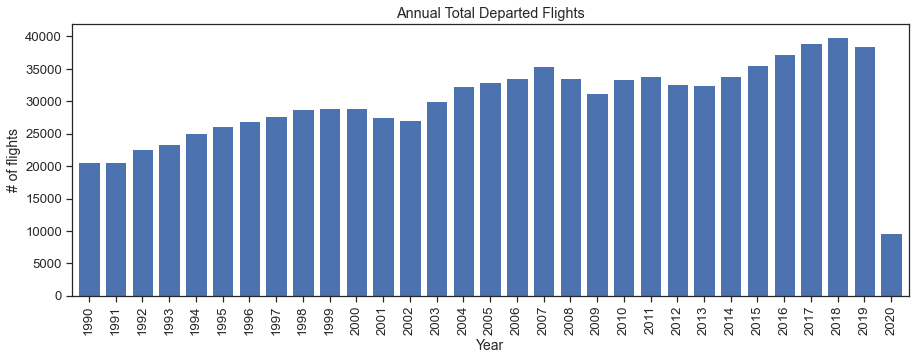

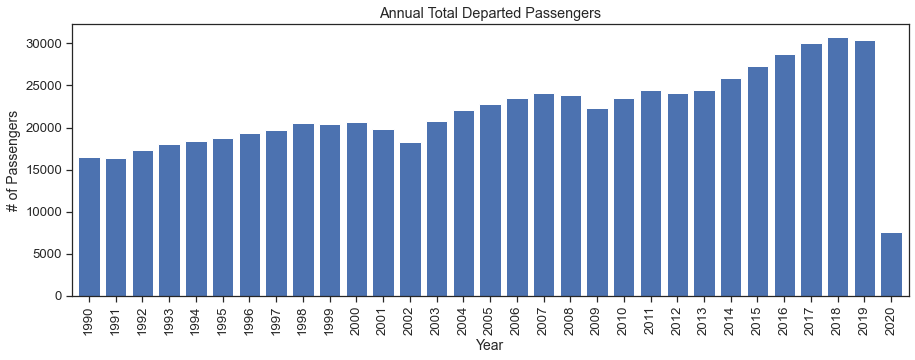

In [176]:
sns.set(font_scale=1.2)
sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(15,5))
depart.Year.value_counts().sort_index().plot.bar(ax=ax, align='center', width=0.8)
plt.ylabel('# of flights', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Annual Total Departed Flights')
#ax.set_yscale("log")
plt.show()


fig, ax = plt.subplots(figsize=(15,5))
passen.Year.value_counts().sort_index().plot.bar(ax=ax, align='center', width=0.8)
#ax.set_yscale("log")
plt.ylabel('# of Passengers', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Annual Total Departed Passengers')
plt.show()

* Overall, the annual number of flights and passengers increses. There are small dips in 2001-2003, 2008-2010. 
* Next, we shoe the **top 20 aiports** regarding the _Departed Flights_ and _Passengers_.
* MIA, LAX, JFK, ORD, EWR are the top 5 busiest aiports over past three decades.

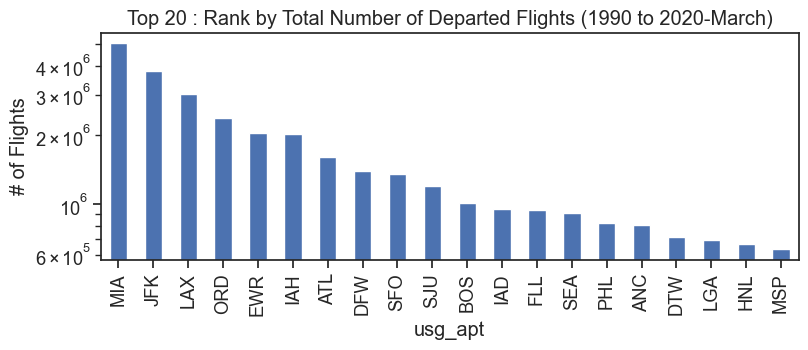

In [174]:
tot_by_apt = depart.groupby(by=['usg_apt'])[['Total']].sum().sort_values(by='Total',ascending=False)

fig, ax = plt.subplots(figsize=(9, 3), dpi=100)
tot_by_apt.head(20).plot.bar(legend=False, ax=ax)
ax.set_yscale('log')
plt.ylabel('# of Flights')
plt.title('Top 20 : Rank by Total Number of Departed Flights (1990 to 2020-March)')
plt.show()

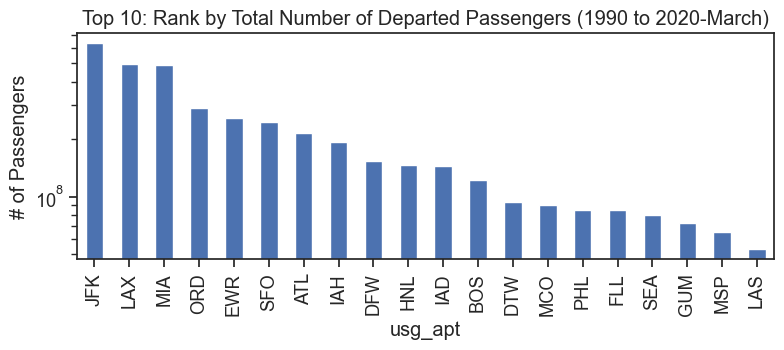

In [175]:
tot_by_passen = passen.groupby(by=['usg_apt'])[['Total']].sum().sort_values(by='Total',ascending=False)

fig, ax = plt.subplots(figsize=(9, 3), dpi=100)
tot_by_passen.head(20).plot.bar(legend=False, ax=ax)
ax.set_yscale('log')
plt.ylabel('# of Passengers')
plt.title('Top 10: Rank by Total Number of Departed Passengers (1990 to 2020-March)')
plt.show()

## Avg. Annual Departed Flights and Passengers  (average from 1990 to 2019)

* We focus on the **top 20 aiports** regarding the _Departed Flights_ and _Passengers_.
* MIA, LAX, JFK, ORD, EWR are the top 5 busiest aiports on yearly average.

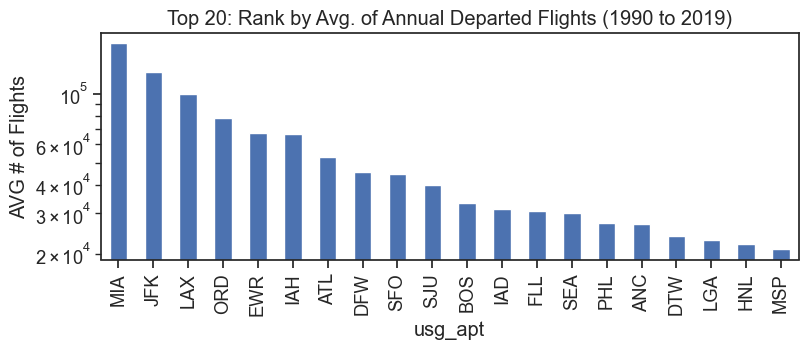

In [134]:
yrTot_apt = depart.groupby(by=['Year', 'usg_apt'])[['Total']].sum().sort_values(by='Total',ascending=False).reset_index()
yrAvg_apt = yrTot_apt.loc[yrTot_apt.Year!=2020].groupby(['usg_apt'])[['Total']].mean().sort_values(by='Total',ascending=False)

fig, ax = plt.subplots(figsize=(9, 3), dpi=100)
yrAvg_apt.head(20).plot.bar(legend=False, ax=ax)
ax.set_yscale('log')
plt.ylabel('AVG # of Flights')
plt.title('Top 20: Rank by Avg. of Annual Departed Flights (1990 to 2019)')
plt.show()

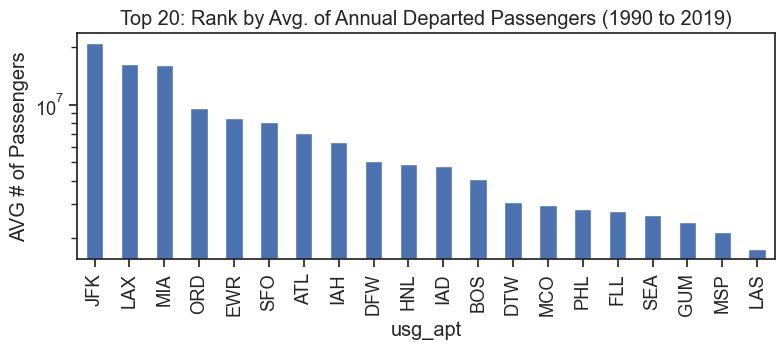

In [133]:
yrTot_passen = passen.groupby(by=['Year', 'usg_apt'])[['Total']].sum().sort_values(by='Total',ascending=False).reset_index()
yrAvg_passen = yrTot_passen.loc[yrTot_passen.Year!=2020].groupby(['usg_apt'])[['Total']].mean().sort_values(by='Total',ascending=False)

fig, ax = plt.subplots(figsize=(9, 3), dpi=100)
yrAvg_passen.head(20).plot.bar(legend=False, ax=ax)
ax.set_yscale('log')
plt.ylabel('AVG # of Passengers')
plt.title('Top 20: Rank by Avg. of Annual Departed Passengers (1990 to 2019)')
plt.show()

## Annual Trending in Total Number of Flights / Passengers  (1990 to 2019)
* We focus on the **top 10 aiports** regarding the _Departed Flights_ and _Passengers_.
* Samll decline between 2001 to 2003, and 2007 to 2009.

In [207]:
apt_list10 = ['MIA', 'LAX', 'JFK', 'ORD', 'EWR', 'SFO', 'ATL', 'IAH', 'DFW', 'HNL']


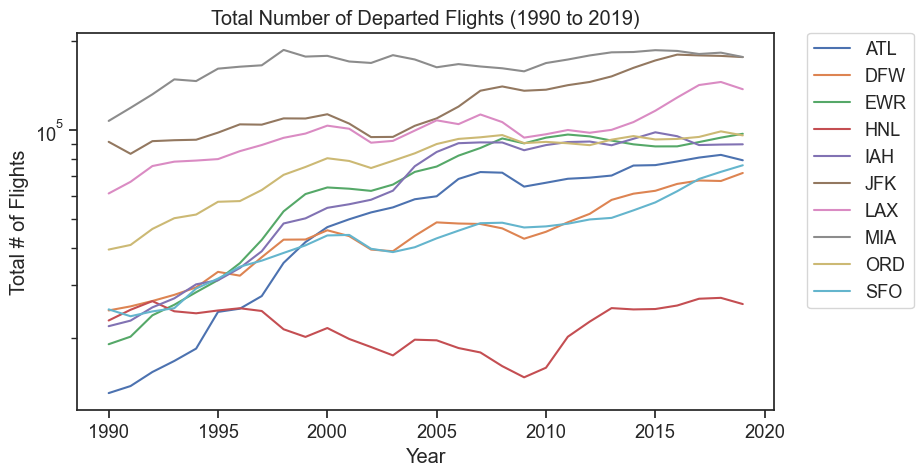

In [238]:
sns.set(font_scale=1.2)
sns.set_style("ticks")

apt_sub = depart[(depart.usg_apt.isin(apt_list10)) & (depart.data_dte < '2020-1-1')].copy()
yrTot_apt = apt_sub.groupby(by=['Year', 'usg_apt'])[['Total']].sum().sort_values(by='Year', ascending=True).reset_index()
yrTot_apt = yrTot_apt[yrTot_apt.Total>10]

## plot
fig, ax = plt.subplots(figsize=(9, 5), dpi=100)
g = sns.lineplot(x='Year' , y='Total', hue='usg_apt', data=yrTot_apt, ax=ax)

h,l = g.get_legend_handles_labels()
ax.legend(h[0:],l[0:], bbox_to_anchor=(1.2, 1), 
          loc=1, borderaxespad=0., fontsize=13)
ax.set_yscale('log')

plt.ylabel('Total # of Flights')
plt.title('Total Number of Departed Flights (1990 to 2019)')
plt.show()

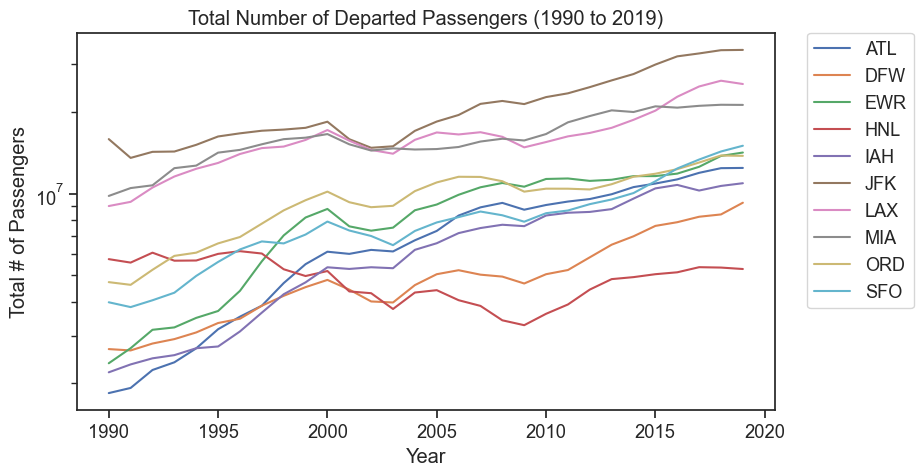

In [237]:
pas_sub = passen[(passen.usg_apt.isin(apt_list10)) & (passen.data_dte < '2020-1-1')].copy()
yrTot_passen = pas_sub.groupby(by=['Year', 'usg_apt'])[['Total']].sum().sort_values(by='Year', ascending=True).reset_index()
yrTot_passen = yrTot_passen[yrTot_passen.Total>0]

fig, ax = plt.subplots(figsize=(9, 5), dpi=100)
g = sns.lineplot(x='Year' , y='Total', hue='usg_apt', data=yrTot_passen, ax=ax)

h,l = g.get_legend_handles_labels()
ax.legend(h[0:],l[0:], bbox_to_anchor=(1.2, 1), 
          loc=1, borderaxespad=0., fontsize=13)
ax.set_yscale('log')

plt.ylabel('Total # of Passengers')
plt.title('Total Number of Departed Passengers (1990 to 2019)')
plt.show()

In [254]:
## plot
yrMax_apt = yrTot_apt.groupby(['usg_apt'])[['Total']].agg(['max','min']).drop
yrMax_apt
#yrTot_apt2 = yrMax_apt.set_index(['usg_apt'])
#yrTot_apt2['Total_norm'] = yrTot_apt.set_index(['usg_apt'])[['Total']]/yrMax_apt
# yrTot_apt[['Total']] = yrTot_apt[['Total']]/ yrMax_apt
#yrTot_apt.reset_index(inplace=True)
# yrTot_apt
# fig, ax = plt.subplots(figsize=(9, 5), dpi=100)
# g = sns.lineplot(x='Year' , y='Total', hue='usg_apt', data=yrTot_apt, ax=ax)

# h,l = g.get_legend_handles_labels()
# ax.legend(h[0:],l[0:], bbox_to_anchor=(1.2, 1), 
#           loc=1, borderaxespad=0., fontsize=13)
# ax.set_yscale('log')

# plt.ylabel('Total # of Flights')
# plt.title('Total Number of Departed Flights (1990 to 2019)')
# plt.show()
#yrTot_apt[['Total']]/yrMax_apt


Total        
            max     min
usg_apt                
ATL       82451   13014
DFW       71661   24696
EWR       97111   19007
HNL       27226   14706
IAH       98226   21858
JFK      179316   83142
LAX      145071   61142
MIA      186002  107279
ORD       98932   39583
SFO       76074   23610

## Avg. Monthly Trending (1990 to 2020-March)

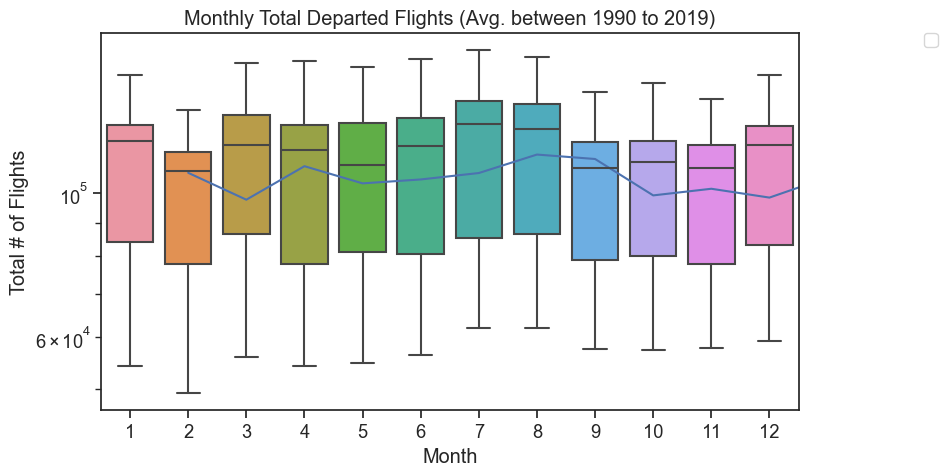

In [206]:

apt_ym = depart.groupby(by=['Year', 'Month'])[['Total']].sum().reset_index()
apt_ym#.head()


monAvg_apt = apt_ym.groupby(by=['Month'])[['Total']].mean().sort_values(by=['Month'], ascending=True).reset_index()
monStd_apt = apt_ym.groupby(by=['Month'])[['Total']].std().sort_values(by=['Month'], ascending=True).reset_index()



fig, ax = plt.subplots(figsize=(9, 5), dpi=100)
#g = sns.lineplot(x='Month' , y='Total', data=monAvg_apt, ax=ax)
# ax.fill_between(monAvg_apt['Month'], monAvg_apt['Total'] - monStd_apt['Total'], 
#                 monAvg_apt['Total'] + monStd_apt['Total'], alpha=0.2)
g = sns.boxplot(x='Month' , y='Total', data=apt_ym, ax=ax)

h,l = g.get_legend_handles_labels()
ax.legend(h[0:],l[0:], bbox_to_anchor=(1.2, 1), 
          loc=1, borderaxespad=0., fontsize=13)
ax.set_yscale('log')

plt.ylabel('Total # of Flights')
plt.title('Monthly Total Departed Flights (Avg. between 1990 to 2019)')
plt.show()
# box plot 

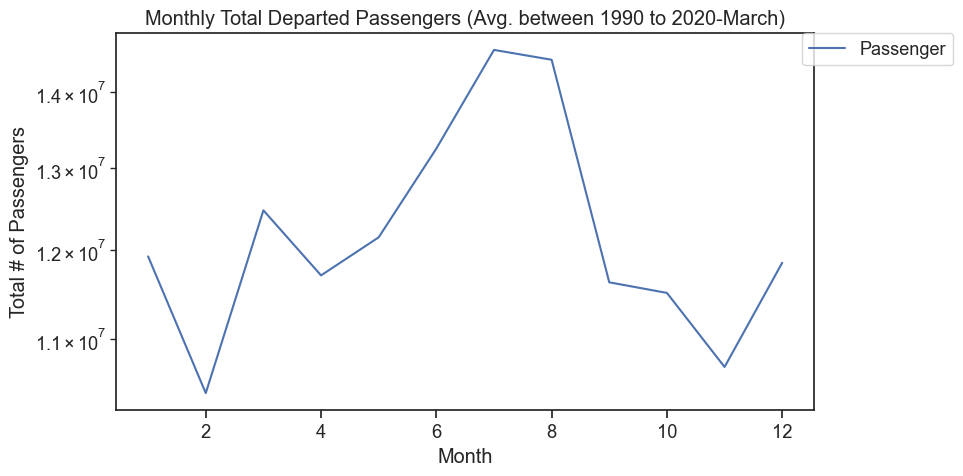

In [204]:
pas_ym = passen.groupby(by=['Year', 'Month'])[['Total']].sum().reset_index()

monAvg_pas = pas_ym.groupby(by=['Month'])[['Total']].mean().sort_values(by=['Month'], ascending=True).reset_index()
#monStd_pas = pas_ym.groupby(by=['Month'])[['Total']].std().sort_values(by=['Month'], ascending=True).reset_index()

fig, ax = plt.subplots(figsize=(9, 5), dpi=100)
g = sns.lineplot(x='Month' , y='Total', data=monAvg_pas, ax=ax)#, label='Passenger')

h,l = g.get_legend_handles_labels()
ax.legend(h[0:],l[0:], bbox_to_anchor=(1.2, 1), 
          loc=1, borderaxespad=0., fontsize=13)
ax.set_yscale('log')

plt.ylabel('Total # of Passengers')
plt.title('Monthly Total Departed Passengers (Avg. between 1990 to 2020-March)')
plt.show()

## Monthly Trending (1990 to 2000)

In [178]:
apt_sub = depart[(depart.usg_apt.isin(apt_list10)) & (depart.data_dte < '2000-1-1')]
apt_sub_ym = apt_sub.groupby(by=['Year', 'Month', 'usg_apt'])[['Total']].sum().reset_index()
apt_sub_ym =  apt_sub_ym[apt_sub_ym.Total>0]
apt_sub_ym.head()

,Year,Month,usg_apt,Total
0,1990,1,ATL,932
1,1990,1,DFW,1905
2,1990,1,EWR,1173
3,1990,1,HNL,2054
4,1990,1,IAH,1657


In [177]:
pas_sub = passen[(passen.usg_apt.isin(apt_list10)) & (passen.data_dte < '2000-1-1')]
pas_sub_ym = pas_sub.groupby(by=['Year', 'Month', 'usg_apt'])[['Total']].sum().reset_index()
pas_sub_ym =  pas_sub_ym[pas_sub_ym.Total>0]
pas_sub_ym.head()

,Year,Month,usg_apt,Total
0,1990,1,ATL,116415
1,1990,1,DFW,200651
2,1990,1,EWR,115000
3,1990,1,HNL,571560
4,1990,1,IAH,162379


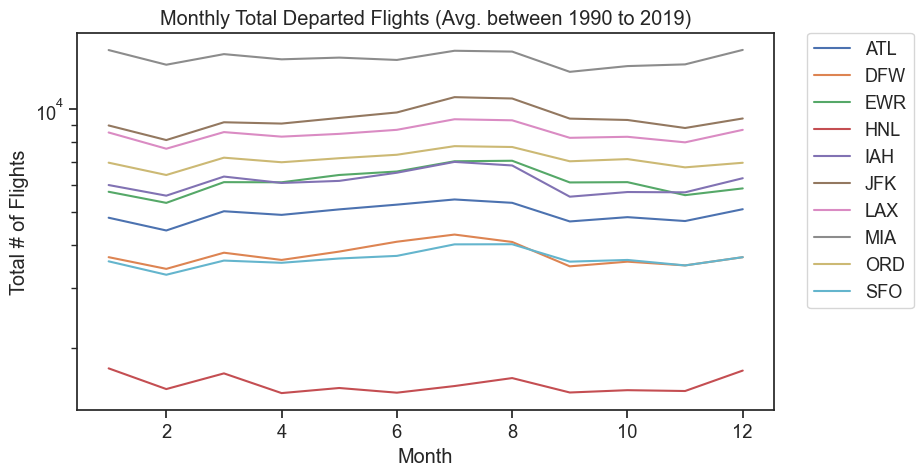

In [188]:
monAvg_apt = apt_sub_ym.groupby(by=['Month', 'usg_apt'])[['Total']].mean().sort_values(by=[
    'usg_apt' ,'Month'], ascending=True).reset_index()
monAvg_apt = monAvg_apt[monAvg_apt.Total>0]


fig, ax = plt.subplots(figsize=(9, 5), dpi=100)
g = sns.lineplot(x='Month' , y='Total', hue='usg_apt', data=monAvg_apt, ax=ax)

h,l = g.get_legend_handles_labels()
ax.legend(h[0:],l[0:], bbox_to_anchor=(1.2, 1), 
          loc=1, borderaxespad=0., fontsize=13)
ax.set_yscale('log')

plt.ylabel('Total # of Flights')
plt.title('Monthly Total Departed Flights (Avg. between 1990 to 2019)')
plt.show()
# Normalized by (min-max)

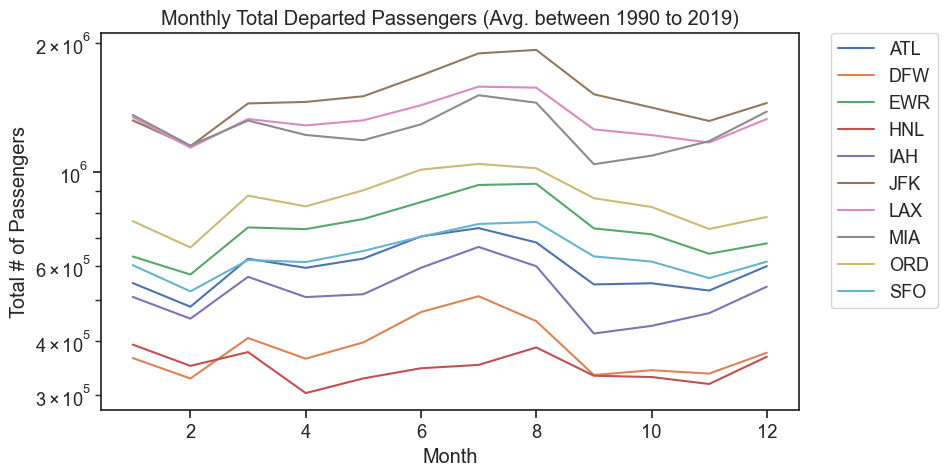

In [189]:
monAvg_pas = pas_sub_ym.groupby(by=['Month', 'usg_apt'])[['Total']].mean().sort_values(by=[
    'usg_apt' ,'Month'], ascending=True).reset_index()
monAvg_pas = monAvg_pas[monAvg_pas.Total>0]


fig, ax = plt.subplots(figsize=(9, 5), dpi=100)
g = sns.lineplot(x='Month' , y='Total', hue='usg_apt', data=monAvg_pas, ax=ax)

h,l = g.get_legend_handles_labels()
ax.legend(h[0:],l[0:], bbox_to_anchor=(1.2, 1), 
          loc=1, borderaxespad=0., fontsize=13)
ax.set_yscale('log')

plt.ylabel('Total # of Passengers')
plt.title('Monthly Total Departed Passengers (Avg. between 1990 to 2019)')
plt.show()


## Monthly Trending (2000 to 2009)

In [179]:
apt_sub = depart[(depart.usg_apt.isin(apt_list10)) & (depart.data_dte >= '2000-1-1') & (depart.data_dte < '2009-1-1')]
apt_sub_ym = apt_sub.groupby(by=['Year', 'Month', 'usg_apt'])[['Total']].sum().reset_index()
apt_sub_ym =  apt_sub_ym[apt_sub_ym.Total>0]
apt_sub_ym.head()

,Year,Month,usg_apt,Total
1200,2000,1,ATL,3431
1201,2000,1,DFW,3579
1202,2000,1,EWR,4942
1203,2000,1,HNL,1777
1204,2000,1,IAH,4445


In [180]:
pas_sub = passen[(passen.usg_apt.isin(apt_list10)) & (passen.data_dte >= '2000-1-1') & (passen.data_dte < '2009-1-1')]
pas_sub_ym = pas_sub.groupby(by=['Year', 'Month', 'usg_apt'])[['Total']].sum().reset_index()
pas_sub_ym =  pas_sub_ym[pas_sub_ym.Total>0]
pas_sub_ym.head()

,Year,Month,usg_apt,Total
1200,2000,1,ATL,391457
1201,2000,1,DFW,347038
1202,2000,1,EWR,572638
1203,2000,1,HNL,414540
1204,2000,1,IAH,404092


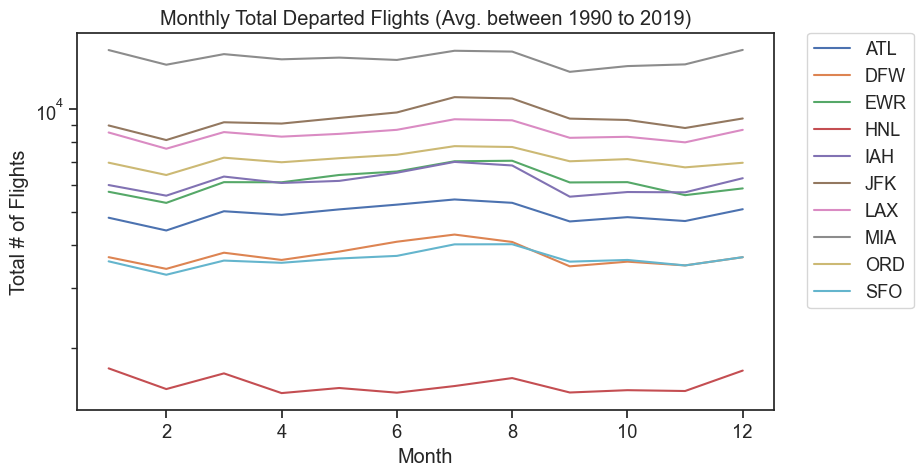

In [191]:
monAvg_apt = apt_sub_ym.groupby(by=['Month', 'usg_apt'])[['Total']].mean().sort_values(by=[
    'usg_apt' ,'Month'], ascending=True).reset_index()
monAvg_apt = monAvg_apt[monAvg_apt.Total>0]


fig, ax = plt.subplots(figsize=(9, 5), dpi=100)
g = sns.lineplot(x='Month' , y='Total', hue='usg_apt', data=monAvg_apt, ax=ax)

h,l = g.get_legend_handles_labels()
ax.legend(h[0:],l[0:], bbox_to_anchor=(1.2, 1), 
          loc=1, borderaxespad=0., fontsize=13)
ax.set_yscale('log')

plt.ylabel('Total # of Flights')
plt.title('Monthly Total Departed Flights (Avg. between 1990 to 2019)')
plt.show()

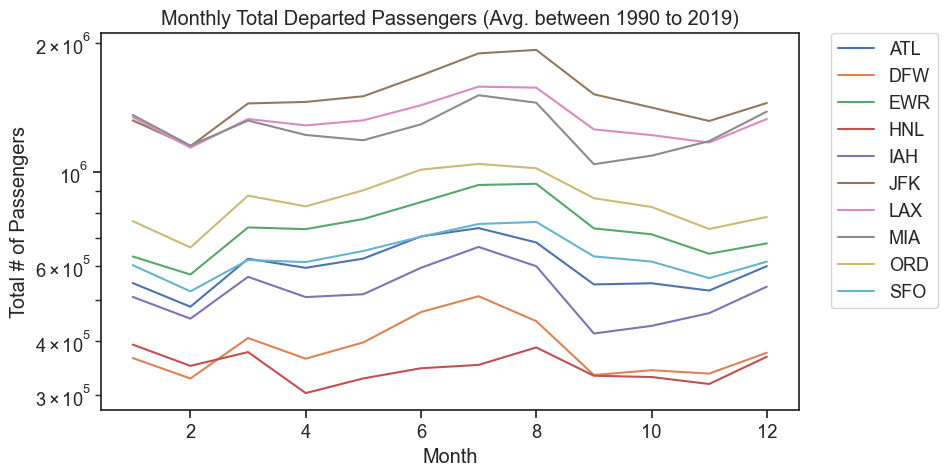

In [190]:
monAvg_pas = pas_sub_ym.groupby(by=['Month', 'usg_apt'])[['Total']].mean().sort_values(by=[
    'usg_apt' ,'Month'], ascending=True).reset_index()
monAvg_pas = monAvg_pas[monAvg_pas.Total>0]


fig, ax = plt.subplots(figsize=(9, 5), dpi=100)
g = sns.lineplot(x='Month' , y='Total', hue='usg_apt', data=monAvg_pas, ax=ax)

h,l = g.get_legend_handles_labels()
ax.legend(h[0:],l[0:], bbox_to_anchor=(1.2, 1), 
          loc=1, borderaxespad=0., fontsize=13)
ax.set_yscale('log')

plt.ylabel('Total # of Passengers')
plt.title('Monthly Total Departed Passengers (Avg. between 1990 to 2019)')
plt.show()


In [57]:
# apt_id_tab = depart[['usg_apt_id', 'usg_apt']].drop_duplicates()
# temp = apt_id_tab.groupby(['usg_apt_id']).count().sort_values('usg_apt',ascending=False)
# apt_id_tab[apt_id_tab.usg_apt_id.isin(temp[temp.usg_apt>1].index.values)].sort_values('usg_apt_id')



,usg_apt_id,usg_apt
196569,10423,BSM
162348,10423,AUS
54214,10466,DQF
47708,10466,AZA
135486,10590,BHC
116684,10590,IFP
149535,11405,XMR
35004,11405,DQY
99391,12544,JQF
113311,12544,USA


In [57]:
# apt_id_tab = passen[['usg_apt_id', 'usg_apt']].drop_duplicates()
# temp = apt_id_tab.groupby(['usg_apt_id']).count().sort_values('usg_apt',ascending=False)
# apt_id_tab[apt_id_tab.usg_apt_id.isin(temp[temp.usg_apt>1].index.values)].sort_values('usg_apt_id')


# flight_dep_by_year = merged_df.groupby(by=['usg_apt', 'Year'])[['Total_d']].sum().reset_index().dropna()
# flight_ari_by_year = merged_df.groupby(by=['fg_apt', 'Year'])[['Total_d']].sum().reset_index().dropna()

# flight_ari_by_year.loc[flight_ari_by_year.groupby(["Year"])["Total_d"].idxmax()]
# # MIA had the most number of departure flights per year
# # YYZ (Toronto Pearson International Airport) has the most arrival

,fg_apt,Year,Total_d
50809,YYZ,1990,69241.0
50810,YYZ,1991,67263.0
50811,YYZ,1992,74437.0
50812,YYZ,1993,73133.0
50813,YYZ,1994,73323.0
50814,YYZ,1995,83101.0
50815,YYZ,1996,81499.0
50816,YYZ,1997,93754.0
50817,YYZ,1998,104951.0
50818,YYZ,1999,100667.0


In [14]:
passen.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 680985 entries, 74116 to 136417
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   data_dte      680985 non-null  datetime64[ns]
 1   Year          680985 non-null  category      
 2   Month         680985 non-null  category      
 3   usg_apt_id    680985 non-null  int64         
 4   usg_apt       680985 non-null  object        
 5   usg_wac       680985 non-null  int64         
 6   fg_apt_id     680985 non-null  int64         
 7   fg_apt        680985 non-null  object        
 8   fg_wac        680985 non-null  int64         
 9   airlineid     680985 non-null  int64         
 10  carrier       678188 non-null  object        
 11  carriergroup  680985 non-null  int64         
 12  type          680985 non-null  object        
 13  Scheduled     680985 non-null  int64         
 14  Charter       680985 non-null  int64         
 15  Total        

In [15]:
display(passen.describe())
passen.select_dtypes(include=['object','category']).describe()

,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000
mean,12779.103825,44.394527,13493.331869,468.122264,20031.610461,0.562233,6478.893801,196.740288,6675.634089
std,2510.939346,28.110753,1955.917890,292.799407,510.270976,0.496112,8622.704655,954.759814,8532.400269
min,10010.000000,1.000000,10125.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,11618.000000,22.000000,11760.000000,204.000000,19623.000000,0.000000,142.000000,0.000000,633.000000
50%,12889.000000,33.000000,13408.000000,429.000000,19917.000000,1.000000,3561.000000,0.000000,3803.000000
75%,13796.000000,74.000000,15092.000000,736.000000,20312.000000,1.000000,9700.000000,0.000000,9761.000000
max,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,149898.000000,58284.000000,150195.000000


,Year,Month,usg_apt,fg_apt,carrier,type
count,680985,680985,680985,680985,678188,680985
unique,31,12,837,1304,591,1
top,2018,3,JFK,YYZ,AA,Passengers
freq,30772,61998,64122,43254,58633,680985


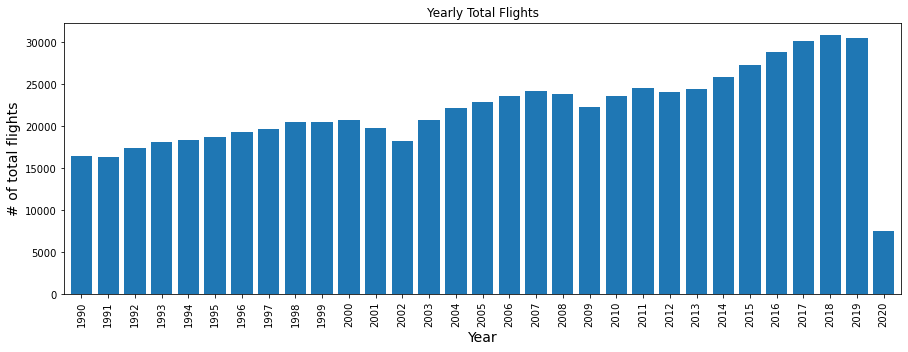

In [16]:
#passen.Year.hist(bins=30)
fig, ax = plt.subplots(figsize=(15,5))
passen.Year.value_counts().sort_index().plot.bar(ax=ax, align='center', width=0.8)
#ax.set_yscale("log")
plt.ylabel('# of total flights', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Yearly Total Flights')
plt.show()

fig, ax = plt.subplots(figsize=(15,5))
depart.Year.value_counts().sort_index().plot.bar(ax=ax, align='center', width=0.8)
#ax.set_yscale("log")
plt.ylabel('# of total flights', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Yearly Total Flights')
plt.show()


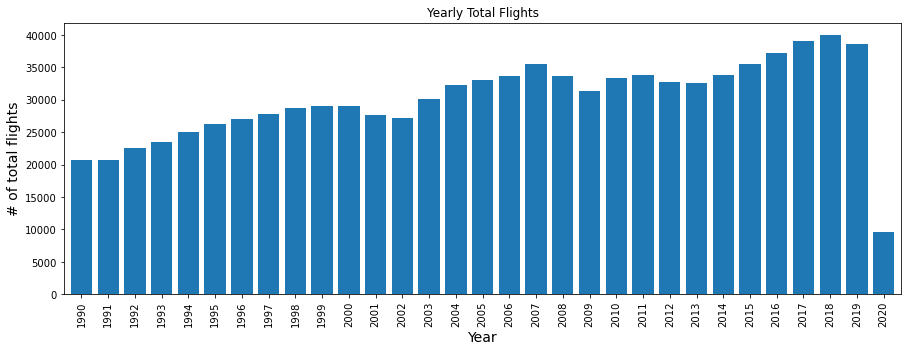

In [17]:
fig, ax = plt.subplots(figsize=(15,5))
depart.Year.value_counts().sort_index().plot.bar(ax=ax, align='center', width=0.8)
#ax.set_yscale("log")
plt.ylabel('# of total flights', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Yearly Total Flights')
plt.show()